<h1>
2.1 - Aproximación
</h1>

<h3>
Uso del algoritmo de Taylor
</h3>

In [1]:
from math import isclose
import numpy as np
import sympy as sym
from sympy.plotting import plot

In [2]:
def graficar(polinomios, funcionReal, x):
    p = plot(*polinomios, funcionReal, (x, -3, 3), show=False)
    p[-1].line_color = 'r'
    p.show()

def ecuacion(x, grado):
    return (x**grado)/np.math.factorial(grado)

In [3]:
def aproximacionTeoremaTaylor(valorPotencia, cifrasSignificativas, decimalesAObservar):
    resActual = 0
    resAnterior = 2

    x = sym.Symbol('x')
    fx = sym.exp(x)
    x0 = 0
    k = 0
    polinomio = 0
    polinomioHistory = []
    cantiDecimales = "{:." + str(decimalesAObservar) + "f}" 
    while not isclose(resActual, resAnterior, abs_tol=10**-cifrasSignificativas):
        resAnterior = resActual
        resActual += ecuacion(valorPotencia, k)

        # Como evaluar la derivada, con respecto a x de orden k
        derivada = fx.diff(x, k)
        # la derivada sustituya la x con el valor de x0
        derivadax0 = derivada.subs(x, x0)

        divisor = np.math.factorial(k)
        terminok = (derivadax0/divisor)*(x-x0)**k

        polinomio += terminok
        polinomioHistory.append(polinomio)

        print("Polinomio iteración " + str(k) + ": " + str(polinomio))
        print(cantiDecimales.format(resActual))

        k += 1

    #for i, polinomio in enumerate(polinomioHistory):
    #    print("Polinomio iteración " + str(i) + ": " + str(polinomio))
    #    print(polinomio.subs(x, 0.3))

    print()
    print("El resultado final en forma de polinomio es el siguiente: " + str(polinomioHistory[-1]))
    print("El resultado final numericamente es el siguiente: " + cantiDecimales.format(resActual))
    graficar(polinomioHistory, fx, x)

Polinomio iteración 0: 1
1.000000000000000
Polinomio iteración 1: x + 1
1.300000000000000
Polinomio iteración 2: x**2/2 + x + 1
1.345000000000000
Polinomio iteración 3: x**3/6 + x**2/2 + x + 1
1.349500000000000
Polinomio iteración 4: x**4/24 + x**3/6 + x**2/2 + x + 1
1.349837500000000
Polinomio iteración 5: x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
1.349857750000000
Polinomio iteración 6: x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
1.349858762500000
Polinomio iteración 7: x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
1.349858805892857
Polinomio iteración 8: x**8/40320 + x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
1.349858807520089
Polinomio iteración 9: x**9/362880 + x**8/40320 + x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
1.349858807574330

El resultado final en forma de polinomio es el siguiente: x**9/362880 + x**8/40320 + x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
El resulta

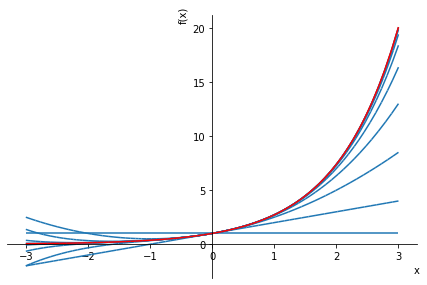

In [4]:
valorPotencia = 0.3
cifrasSignificativas = 10
cantidadDigitosAMostrar = 15
aproximacionTeoremaTaylor(valorPotencia, cifrasSignificativas, cantidadDigitosAMostrar)